# Importing Essential Libraries

In [1]:
# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn import metrics

# Importing and Reading CSV

In [2]:
# Loading and Exporting Data
data = pd.read_csv("/kaggle/input/house-price/1553768847-housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Getting Data Information

In [3]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# Checking Nulls
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
#Removing Nulls
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [6]:
# Getting Data Summary
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Spliting Data

In [7]:
# Seprating X and y variables
X = data.drop(['median_house_value'], axis= 1)
y = data['median_house_value']

In [8]:
# Spliting X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# Seprating Train data For EDA
train_data = X_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7751,-118.15,33.92,28,1038,252.0,912,245,2.5875,<1H OCEAN,161200
16050,-122.48,37.76,48,2304,558.0,1273,512,3.2750,NEAR BAY,332100
17158,-122.21,37.42,28,564,72.0,191,79,11.9666,NEAR OCEAN,500001
10893,-117.87,33.72,37,2216,497.0,2445,506,3.8421,<1H OCEAN,174000
9879,-121.84,36.62,26,32,8.0,27,10,2.2250,<1H OCEAN,150000


# Performing EDA

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

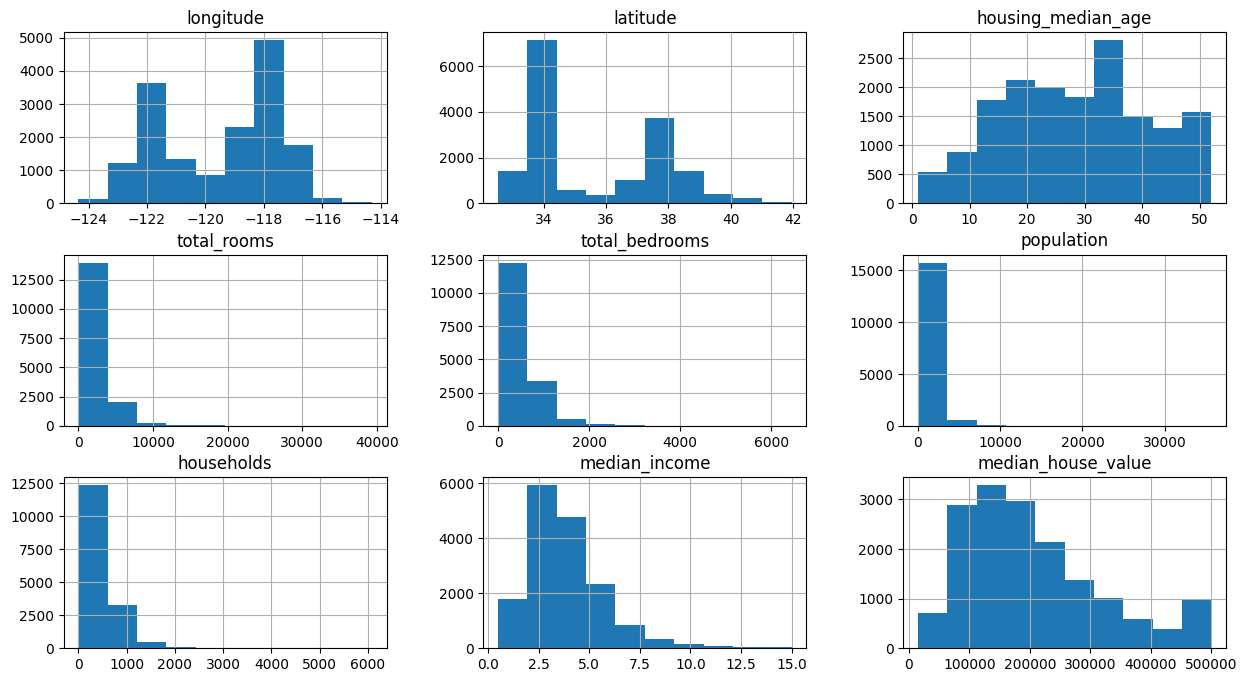

In [10]:
# Ploting Frequency Histogram
train_data.hist(figsize = (15, 8))

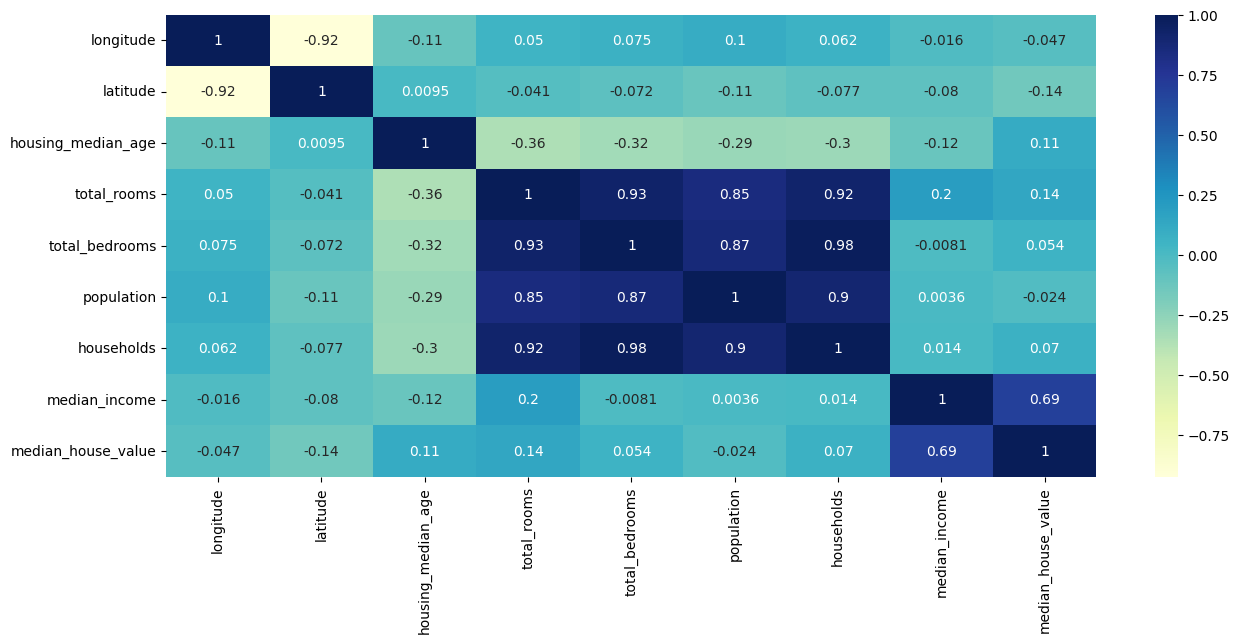

In [11]:
# Displaying correleation
plt.figure(figsize=(15, 6))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap="YlGnBu")
plt.show()


# Preprocessing

In [12]:
# Dealing with Outliers
train_data['population'] = np.log(train_data['population'] +1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

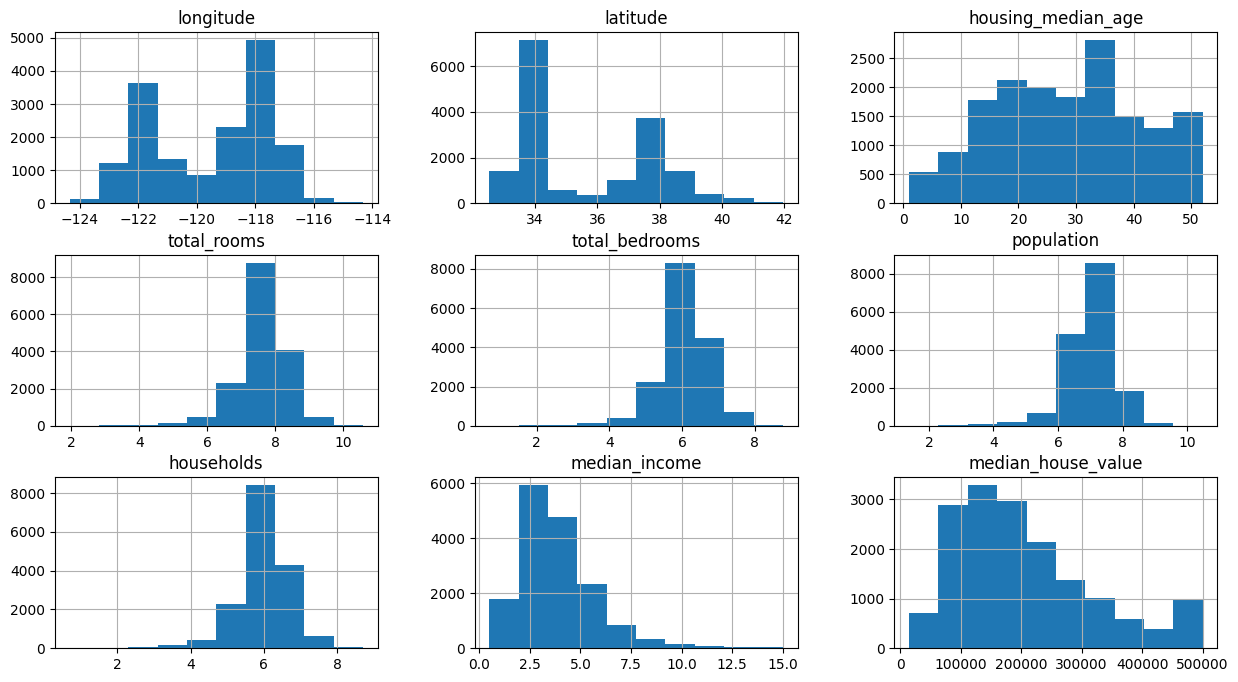

In [13]:
# Displaying Preprocessed Data
train_data.hist(figsize =(15, 8))

In [14]:
#Converting String data into Numerical
pd.get_dummies(train_data['ocean_proximity']).sum()

<1H OCEAN     7196
INLAND        5213
ISLAND           3
NEAR BAY      1813
NEAR OCEAN    2121
dtype: int64

In [15]:
# Joining with Actual Data
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7751,-118.15,33.92,28,6.946014,5.533389,6.816736,5.505332,2.5875,161200,True,False,False,False,False
16050,-122.48,37.76,48,7.742836,6.326149,7.149917,6.240276,3.2750,332100,False,False,False,True,False
17158,-122.21,37.42,28,6.336826,4.290459,5.257495,4.382027,11.9666,500001,False,False,False,False,True
10893,-117.87,33.72,37,7.703910,6.210600,7.802209,6.228511,3.8421,174000,True,False,False,False,False
9879,-121.84,36.62,26,3.496508,2.197225,3.332205,2.397895,2.2250,150000,True,False,False,False,False


In [16]:
# Converting ocean_proximity values from Boolean to Numeric
boolean_columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

for col in boolean_columns:
    train_data[col] = train_data[col].astype(int)

train_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7751,-118.15,33.92,28,6.946014,5.533389,6.816736,5.505332,2.5875,161200,1,0,0,0,0
16050,-122.48,37.76,48,7.742836,6.326149,7.149917,6.240276,3.2750,332100,0,0,0,1,0
17158,-122.21,37.42,28,6.336826,4.290459,5.257495,4.382027,11.9666,500001,0,0,0,0,1
10893,-117.87,33.72,37,7.703910,6.210600,7.802209,6.228511,3.8421,174000,1,0,0,0,0
9879,-121.84,36.62,26,3.496508,2.197225,3.332205,2.397895,2.2250,150000,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

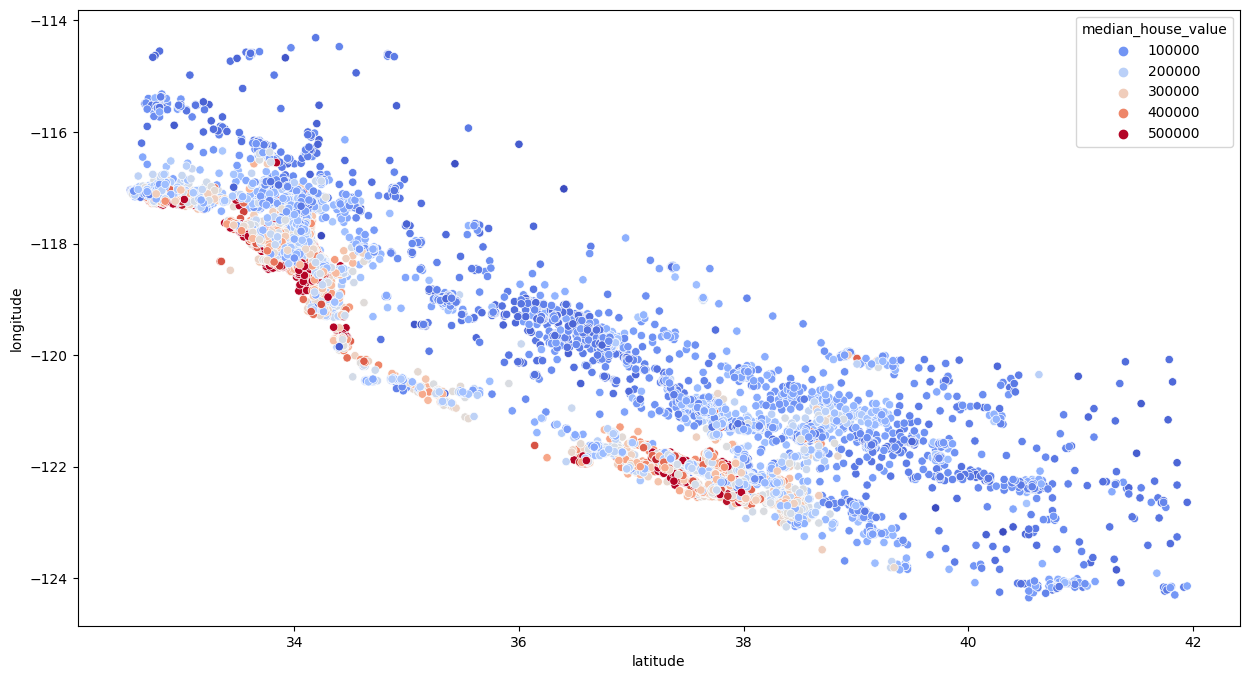

In [17]:
# Analyzing logitude and latitude
plt.figure(figsize =(15, 8))
sns.scatterplot(x = 'latitude', y ='longitude', hue = "median_house_value", data = train_data, palette = 'coolwarm')

# Data Engineering

In [18]:
# Adding More Features
train_data['bedrooms_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_ratio'] = train_data['total_rooms']/train_data['households']

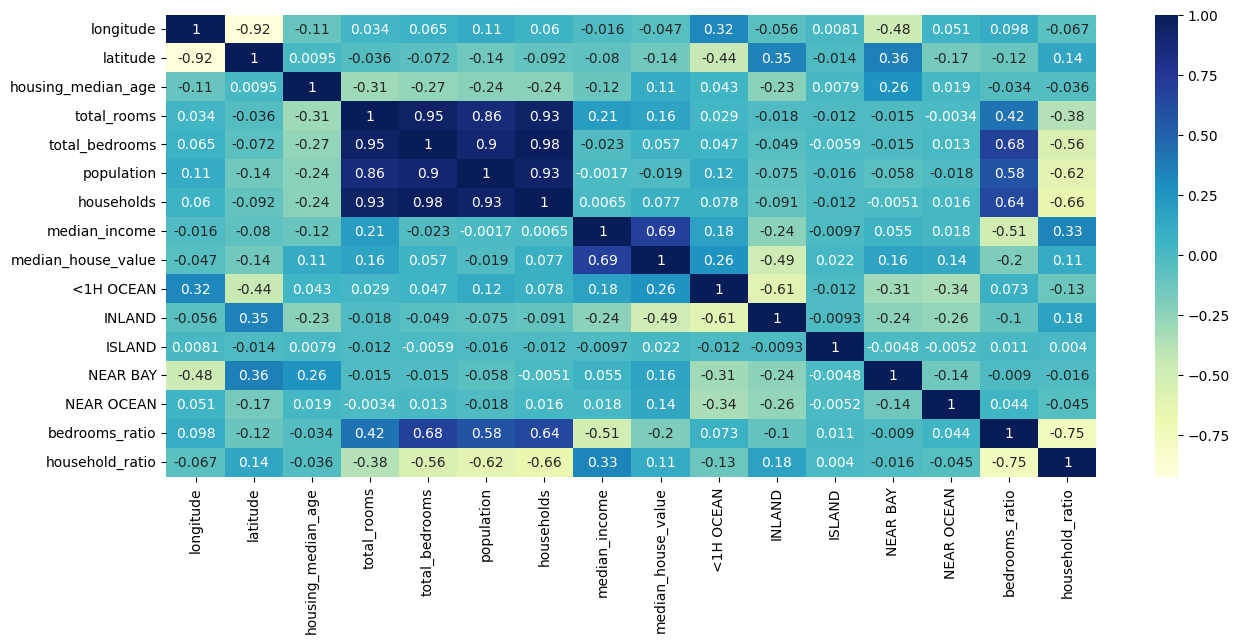

In [19]:
# Displaying Relational Heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()


# Applying Linear Regression

In [20]:
# Removing and Adding targetted variable Respectivly
X_train, y_train = train_data.drop(['median_house_value'], axis =1), train_data['median_house_value']

In [21]:
test_data = X_test.join(y_test)
test_data['population'] = np.log(test_data['population'] +1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['households'] = np.log(test_data['households'] +1)
pd.get_dummies(test_data['ocean_proximity'])
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
boolean_columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

for col in boolean_columns:
    test_data[col] = test_data[col].astype(int)

test_data['bedrooms_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_ratio'] = test_data['total_rooms']/test_data['households']

test_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,household_ratio
9593,-120.46,37.33,4,6.668228,4.762174,5.910797,4.700480,6.3215,138200,0,1,0,0,0,0.714159,1.418627
5513,-118.41,33.99,36,6.993933,5.459586,6.450470,5.375278,3.6538,276100,1,0,0,0,0,0.780617,1.301129
15203,-117.08,32.93,5,9.612132,7.820440,8.794976,7.786552,6.0857,308300,1,0,0,0,0,0.813601,1.234453
13611,-117.27,34.15,35,7.307202,5.537334,6.559615,5.537334,3.3616,95300,0,1,0,0,0,0.757791,1.319625
5208,-118.29,33.93,41,6.799056,5.293305,6.406880,5.129899,2.2778,128100,1,0,0,0,0,0.778535,1.325378


In [22]:
# Targetted Variable Evaluation
X_test, y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']

In [23]:
# Applying Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
# Evaluating Model
reg.score(X_test, y_test)

0.6593594618063827

# Using Random Forest Model

In [25]:
# Importing Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
# Evaluating Model
forest.score(X_train, y_train)

0.9743254707183026

In [27]:
# Make predictions on the training and test sets
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [28]:
# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error on Train Set: {mae_train:.4f}')
print(f'Mean Absolute Error on Test Set: {mae_test:.4f}')

Mean Absolute Error on Train Set: 12062.5914
Mean Absolute Error on Test Set: 32455.6128


In [29]:
# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Train Set: {mse_train:.4f}')
print(f'Mean Squared Error on Test Set: {mse_test:.4f}')

Mean Squared Error on Train Set: 343293747.6794
Mean Squared Error on Test Set: 2498453292.4568


In [30]:
# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'Root Mean Squared Error on Train Set: {rmse_train:.4f}')
print(f'Root Mean Squared Error on Test Set: {rmse_test:.4f}')

Root Mean Squared Error on Train Set: 18528.1879
Root Mean Squared Error on Test Set: 49984.5305


In [31]:
# R² Score (Coefficient of Determination)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² Score on Train Set: {r2_train:.4f}')
print(f'R² Score on Test Set: {r2_test:.4f}')

R² Score on Train Set: 0.9743
R² Score on Test Set: 0.8098
